In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\bhara\Downloads\Wine_clust.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Agglomerative Clustering

In [6]:
import scipy.cluster.hierarchy as sch

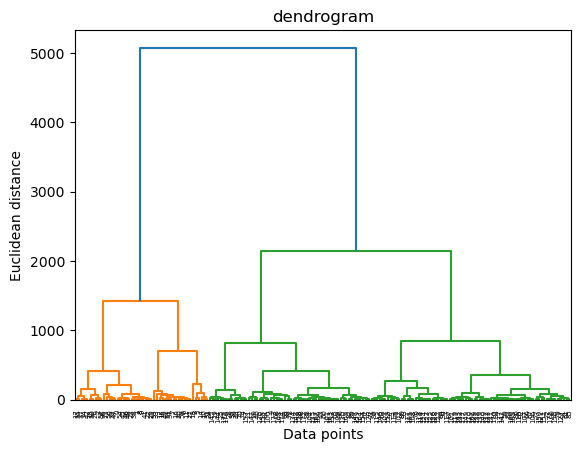

In [7]:
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

In [8]:
#Agglomerative HC model
from sklearn.cluster import AgglomerativeClustering

In [9]:
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(df)

In [10]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# silhouette score

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
sil_avg= silhouette_score(df, y_hc)
print(sil_avg)

0.6587292996216912


# K means

In [13]:
from sklearn.cluster import KMeans


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


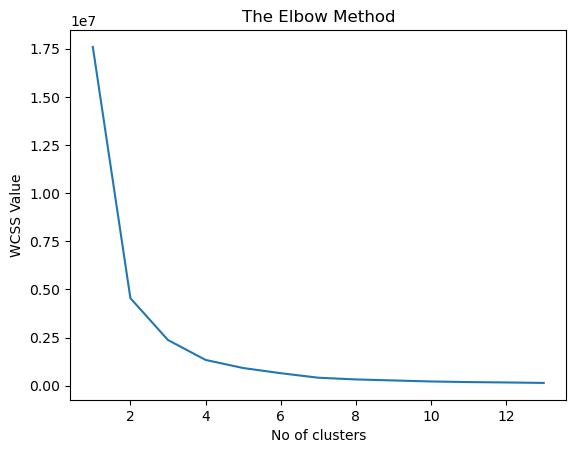

In [14]:
wcss = []

for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 14), wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS Value')
plt.title('The Elbow Method')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(df)

In [16]:
y_kmeans

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

# silhouette score

In [17]:
sil_avg= silhouette_score(df, y_kmeans)
print(sil_avg)

0.5620323449580346


In [18]:
#Conclusion : Kmeans clustering has 4 clusters and Agglomerative Clustering has 2 clusters.

# DB scan

In [19]:
from sklearn.cluster import DBSCAN